### CHALLENGE_03

Linear Model: Fit a regression model (with an out-of-sample R42 of > 0.01) to a financial time series.
    
Financial series have a low signal-to-noise ratio, so even a weak correlation will require some basic feature engineering (moving average prices, volatility, etc).
    
What are some of the weaknesses of the model an how can it be improved with additional work?

#### NSE_20 Dataset

Dataset of performance of NSE_20 Index

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [3]:
# Load Dataset
df = pd.read_csv("data/NSE_20.csv", parse_dates=["Date"], index_col=0).sort_index(ascending=True)
df.sample(2)

,Index
Date,
2011-03-03,4182.58
2002-08-02,1080.12


In [4]:
# Size of Dataset
df.shape

(4225, 1)

In [5]:
# Check Date Range
str(df.index.min()), str(df.index.max())

('2001-01-04 00:00:00', '2017-12-29 00:00:00')

In [6]:
# Check Datatypes
df.dtypes

 Index     float64
dtype: object

In [7]:
# Check Missing Values
df.isna().sum()

 Index     0
dtype: int64

In [8]:
# Resample Time Series to Weekly Frequencies
df_resampled = df.resample("W").mean()
df_resampled.dropna(inplace=True)
df_resampled.sample(2)

,Index
Date,
2004-10-31,2812.866
2005-04-03,3132.965


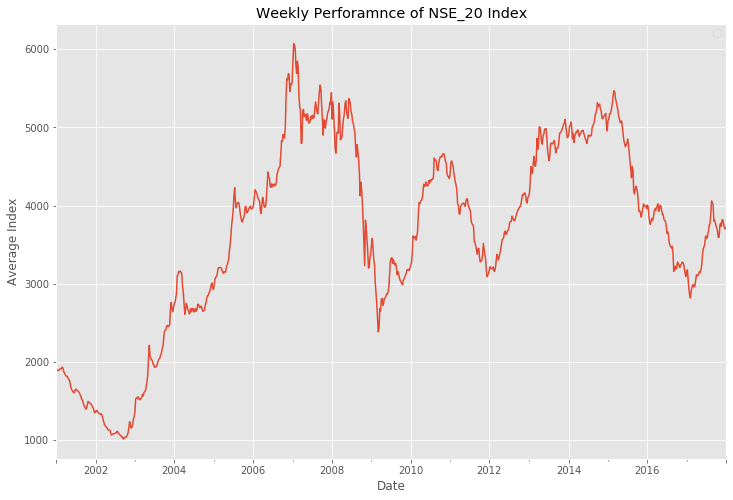

In [9]:
# Weekly Perforamnce of NSE_20 Index
fig, ax = plt.subplots(figsize=(12, 8))
df_resampled.plot(kind="line", ax=ax)
plt.legend("")
ax.set_xlabel("Date")
ax.set_ylabel("Average Index")
ax.set_title("Weekly Perforamnce of NSE_20 Index")
plt.savefig("images/Weekly_Perforamnce_of_NSE_20_Index.svg")

In [10]:
# Check Missing Values
df_resampled.isna().sum()

 Index     0
dtype: int64

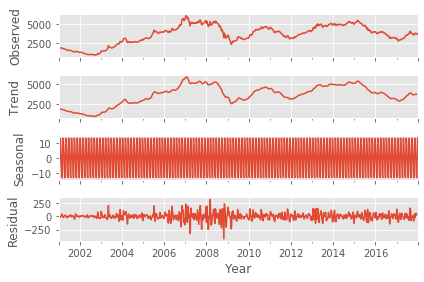

In [11]:
# Time Series Decomposition
decomp = sm.tsa.seasonal_decompose(df_resampled, model="additive", freq=7)
fig = decomp.plot()
plt.xlabel('Year')
plt.savefig('images/Time_Series_Decomposition.svg')

In [12]:
# Check Dimension
df_resampled.shape

(887, 1)

In [13]:
# Train/Test Split Parameters
n = df_resampled.shape[0]
test_size = int(0.015 * n)

In [14]:
# Train/Test Split
train = df_resampled[:-test_size]
test = df_resampled[-test_size:]
train.shape[0], test.shape[0]

(874, 13)

In [15]:
# Time series forecasting with ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
# Hyperparameter Optimization
minimum = {"param": "", "param_seasonal": "", "results":15000}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if results.aic < minimum["results"]:
                minimum["param"] = param
                minimum["param_seasonal"] = param_seasonal
                minimum["results"] = results.aic
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16890.701822842595
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16067.149107956971
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12681.365113156966
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12471.62376052132
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12697.131819292807
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12644.322648945987
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12478.17527919478
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12464.428370576024
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16227.179402208285
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14411.193920584037
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:11704.626169632731
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:11530.561761495046
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11733.014061865037
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11689.15290318561
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:11554.795712272271
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:11528.09388235148
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10229.057167952924
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10097.116531237

In [17]:
# Model Fitting
mod = sm.tsa.statespace.SARIMAX(train, order=minimum["param"], seasonal_order=minimum["param_seasonal"], enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2750      0.018     15.587      0.000       0.240       0.310
ma.S.L12      -1.0000      0.024    -42.063      0.000      -1.047      -0.953
sigma2      6868.0996   3.46e-06   1.98e+09      0.000    6868.100    6868.100


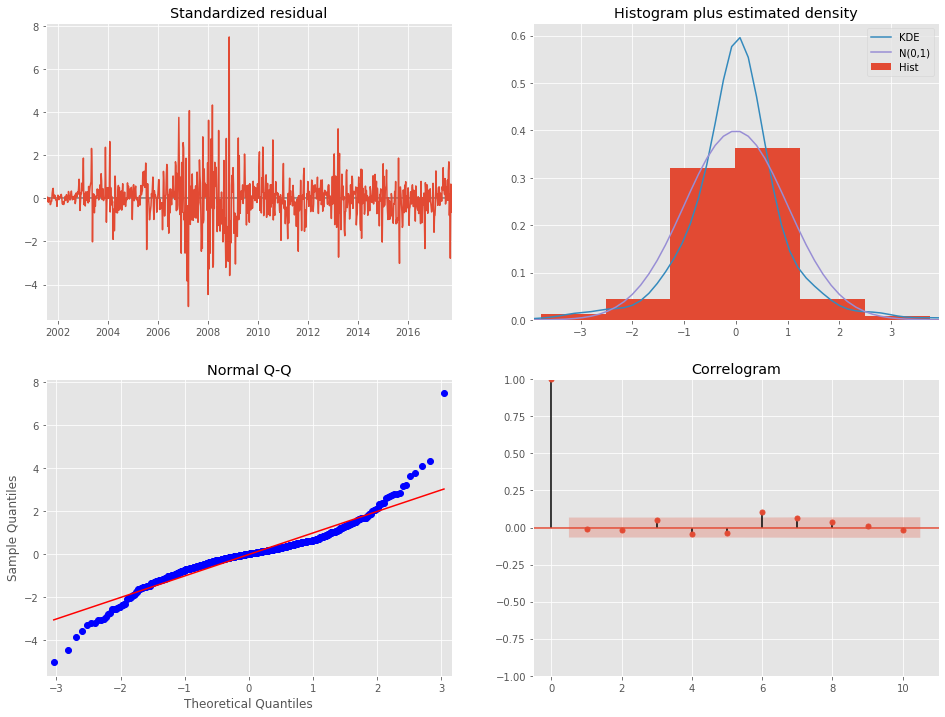

In [18]:
# Run Diagnostics
fig = results.plot_diagnostics(figsize=(16, 12))
plt.savefig('images/Model_Diagnostics_Cumulative.svg')

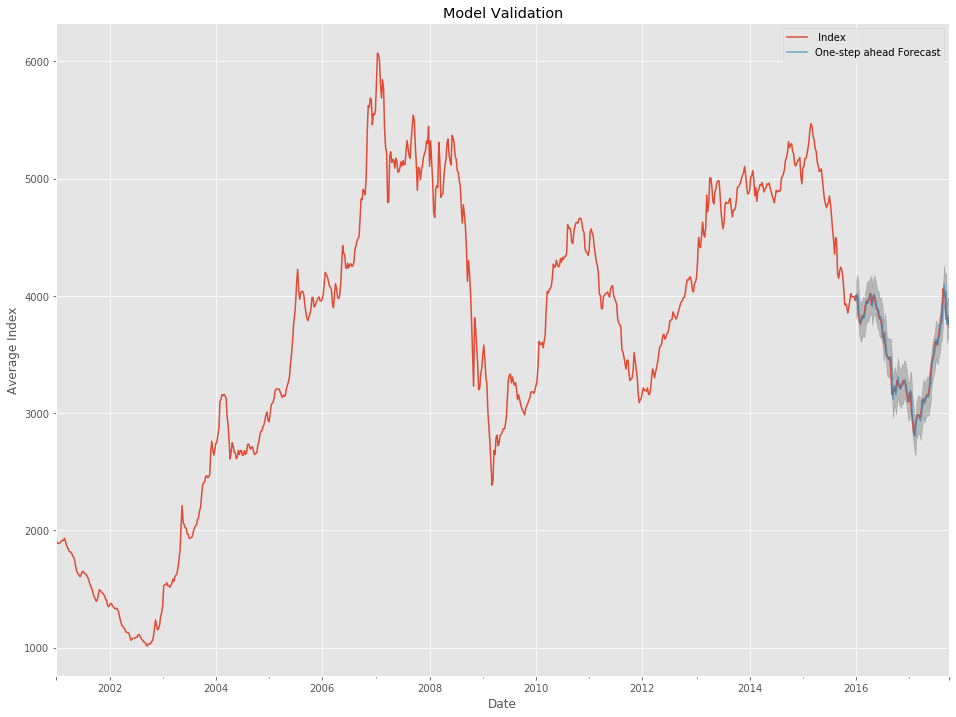

In [19]:
# Model Validating
pred = results.get_prediction(start=pd.to_datetime('2016-01-03'), dynamic=False)
pred_ci = pred.conf_int()

ax = train['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 12))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Average Index')
ax.set_title('Model Validation')
ax.legend()
plt.savefig("images/Model_Validation.svg")

In [20]:
# Error
validation_forecasted = pred.predicted_mean.to_frame("predictions")
validation_truth = train['2016-01-03':]
mse = ((validation_forecasted["predictions"] - validation_truth[" Index "]) ** 2).mean()

print('The Mean Squared Error of our validation set is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our validation set is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our validation set is 3573.3
The Root Mean Squared Error of our validation set is 59.78


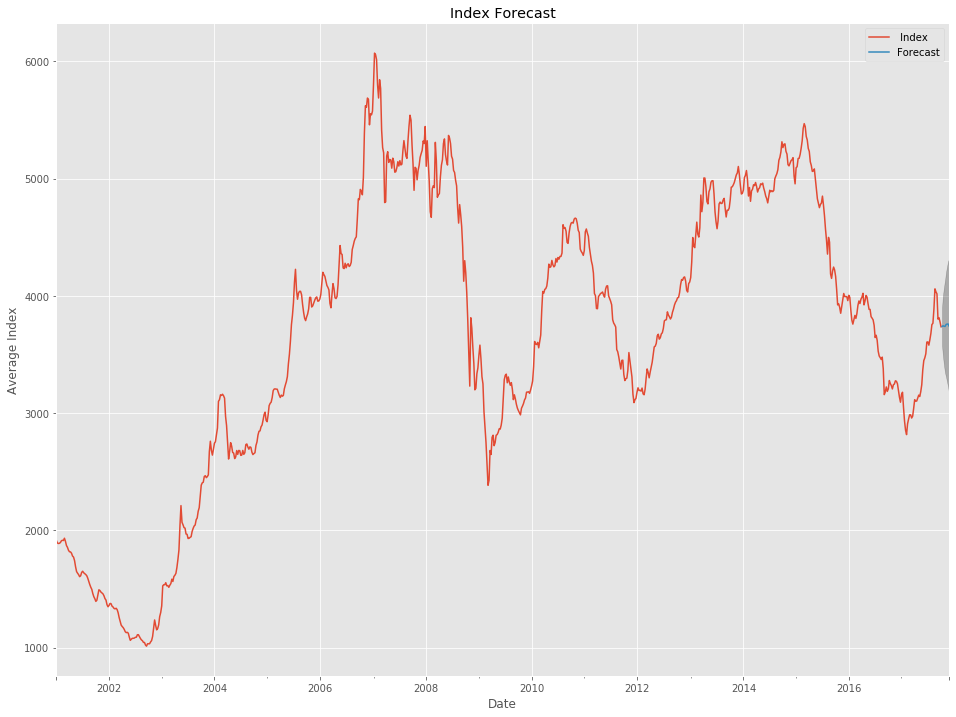

In [21]:
# Model Pridiction
pred_uc = results.get_forecast(steps=8)
pred_ci = pred_uc.conf_int()

ax = train.plot(label='observed', figsize=(16, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Average Index')
ax.set_title('Index Forecast')
ax.legend()
plt.savefig('images/Model_prediction.svg')

In [22]:
# Error
test_forecasted = pred_uc.predicted_mean.to_frame("predictions")
test_truth = test
mse = ((test_forecasted["predictions"] - test_truth[" Index "]) ** 2).mean()

print('The Mean Squared Error of our test set is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our test set is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our test set is 7155.49
The Root Mean Squared Error of our test set is 84.59
